In [83]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
ticker_symbol = 'NVDA'
start_date = '2020-01-01'
end_date = datetime.datetime.now().strftime('%Y-%m-%d')
nvda_data = yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [26]:
nvda_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,59.687500,59.977501,59.180000,59.977501,59.741238,23753600
2020-01-03,58.775002,59.457500,58.525002,59.017502,58.785023,20538400
2020-01-06,58.080002,59.317501,57.817501,59.264999,59.031551,26263600
2020-01-07,59.549999,60.442501,59.097500,59.982498,59.746216,31485600
2020-01-08,59.939999,60.509998,59.537498,60.095001,59.858280,27710800


In [29]:
nvda_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-22,954.590027,960.200012,932.489990,949.500000,949.500000,54864800
2024-05-23,1020.280029,1063.199951,1015.200012,1037.989990,1037.989990,83506500
2024-05-24,1044.489990,1064.750000,1030.000000,1064.689941,1064.689941,42650200
2024-05-28,1102.439941,1149.390015,1098.829956,1139.010010,1139.010010,65272800
2024-05-29,1130.500000,1154.920044,1109.010010,1148.250000,1148.250000,55552100


In [18]:
nvda_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [28]:
nvda_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1.109000e+03
mean,265.091010,270.057924,260.007549,265.360816,265.152324,4.675329e+07
std,208.228069,211.925219,204.372667,208.523358,208.599889,1.864143e+07
min,50.025002,52.485001,45.169998,49.099998,48.935837,9.788400e+06
25%,133.565002,135.600006,130.990005,133.412506,133.133682,3.427640e+07
50%,189.669998,193.750000,185.800003,190.309998,189.982208,4.430770e+07
75%,304.179993,311.600006,297.850006,303.899994,303.429962,5.665110e+07
max,1130.500000,1154.920044,1109.010010,1148.250000,1148.250000,1.543911e+08


In [34]:
nvda_data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [35]:
nvda_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1109 entries, 2020-01-02 to 2024-05-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1109 non-null   float64
 1   High       1109 non-null   float64
 2   Low        1109 non-null   float64
 3   Close      1109 non-null   float64
 4   Adj Close  1109 non-null   float64
 5   Volume     1109 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 60.6 KB


<Axes: xlabel='Date'>

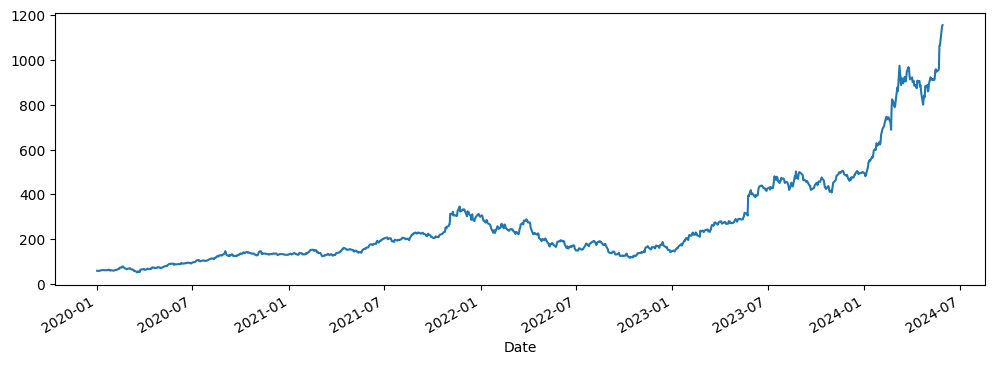

In [24]:
nvda_data['High'].plot(figsize=(12,4))

<Axes: xlabel='Date'>

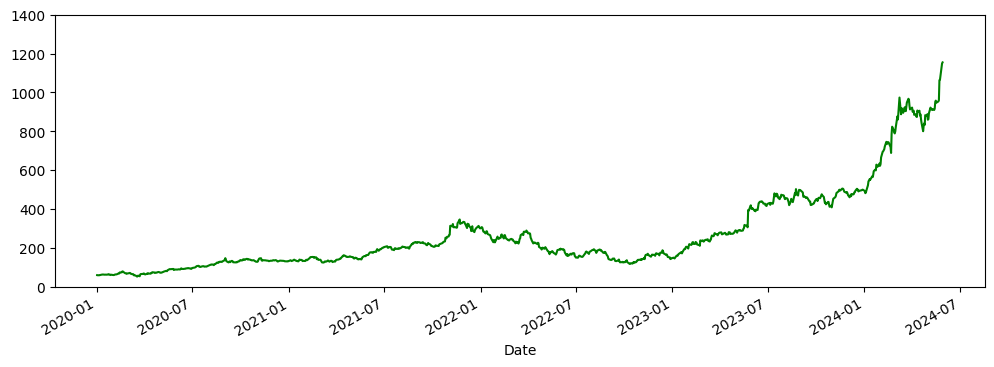

In [31]:
nvda_data['High'].plot(ylim=[0,1400],figsize=(12,4),c='green')

In [37]:
nvda_data.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2024-05-15', '2024-05-16', '2024-05-17', '2024-05-20',
               '2024-05-21', '2024-05-22', '2024-05-23', '2024-05-24',
               '2024-05-28', '2024-05-29'],
              dtype='datetime64[ns]', name='Date', length=1109, freq=None)

In [43]:
index = nvda_data.loc['2020-01-01':'2024-05-29'].index
share_open = nvda_data.loc['2020-01-01':'2024-05-29']['Open']

In [42]:
share_open.head()

Date
2020-01-02    59.687500
2020-01-03    58.775002
2020-01-06    58.080002
2020-01-07    59.549999
2020-01-08    59.939999
Name: Open, dtype: float64

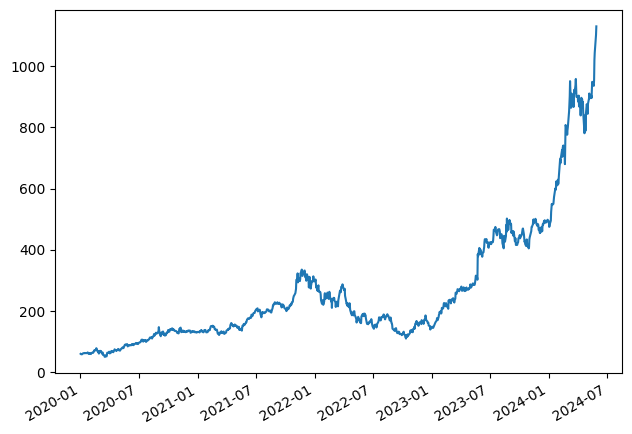

In [48]:
fig,ax = plt.subplots()
plt.tight_layout()
fig.autofmt_xdate()
ax.plot(index,share_open)

In [50]:
df_nvidia = nvda_data.reset_index()

In [51]:
df_nvidia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1109 non-null   datetime64[ns]
 1   Open       1109 non-null   float64       
 2   High       1109 non-null   float64       
 3   Low        1109 non-null   float64       
 4   Close      1109 non-null   float64       
 5   Adj Close  1109 non-null   float64       
 6   Volume     1109 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 60.8 KB


### Rule A means year end frequency

In [52]:
nvda_data.resample(rule='A').min()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,50.025002,52.485001,45.169998,49.099998,48.935837,9788400
2021-12-31,121.302498,124.712502,115.665001,115.932503,115.666374,14627600
2022-12-31,109.709999,117.349998,108.129997,112.269997,112.186241,16793400
2023-12-31,144.740005,145.639999,140.339996,142.649994,142.580048,19820900
2024-12-31,474.850006,481.839996,473.200012,475.690002,475.667694,28322000


In [54]:
nvda_data.resample(rule='A').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,147.037506,147.267502,140.187500,145.619995,145.242783,146368400
2021-12-31,335.170013,346.470001,320.359985,333.760010,333.243835,115363100
2022-12-31,302.769989,307.109985,297.850006,301.209991,300.781036,117886500
2023-12-31,502.160004,505.480011,494.119995,504.089996,504.022034,154391100
2024-12-31,1130.500000,1154.920044,1109.010010,1148.250000,1148.250000,113299600


<Axes: xlabel='Date'>

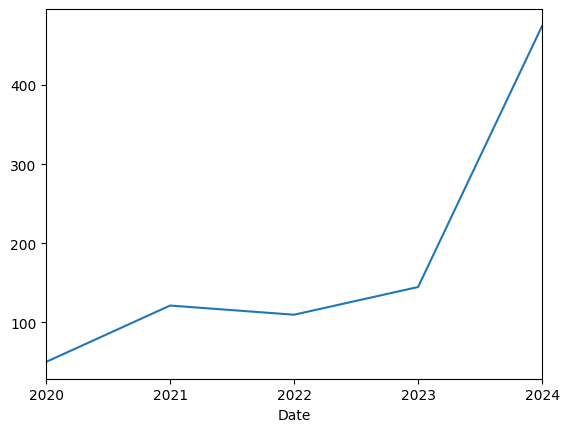

In [56]:
nvda_data.resample(rule='A').min()['Open'].plot()

<Axes: xlabel='Date'>

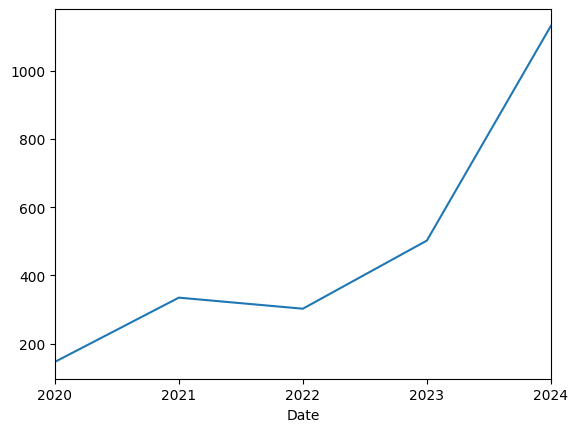

In [57]:
nvda_data.resample(rule='A').max()['Open'].plot()

### Quaterly Start frequency

In [59]:
nvda_data.resample(rule='QS').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,78.192497,79.080002,75.372498,78.675003,78.365089,113325200
2020-04-01,95.510002,96.425003,94.074997,95.267502,94.992332,117589200
2020-07-01,147.037506,147.267502,139.000000,143.464996,143.093414,146368400
2020-10-01,145.524994,146.914993,140.187500,145.619995,145.242783,78442000
2021-01-01,151.710007,153.725006,149.500000,153.302505,152.950623,82443600
2021-04-01,199.992493,201.625000,198.637497,200.267502,199.922546,96885600
2021-07-01,228.330002,230.429993,225.509995,228.429993,228.076752,76655500
2021-10-01,335.170013,346.470001,320.359985,333.760010,333.243835,115363100
2022-01-01,302.769989,307.109985,297.850006,301.209991,300.781036,91398200


In [58]:
nvda_data.resample(rule='QS').min()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,50.025002,52.485001,45.169998,49.099998,48.935837,18975200
2020-04-01,61.060001,63.907501,59.597500,60.767502,60.564327,25440800
2020-07-01,95.207497,95.757500,94.129997,95.300003,95.024734,24431600
2020-10-01,126.577499,128.367493,123.000000,125.339996,125.015335,9788400
2021-01-01,121.302498,124.712502,115.665001,115.932503,115.666374,16398000
2021-04-01,135.664993,138.699997,134.589996,136.652496,136.385880,16457200
2021-07-01,179.152496,188.380005,178.654999,181.610001,181.297180,14644300
2021-10-01,199.500000,205.419998,195.550003,197.320007,197.014893,14627600
2022-01-01,210.149994,222.619995,206.500000,213.300003,213.032532,35482900


<Axes: xlabel='Date'>

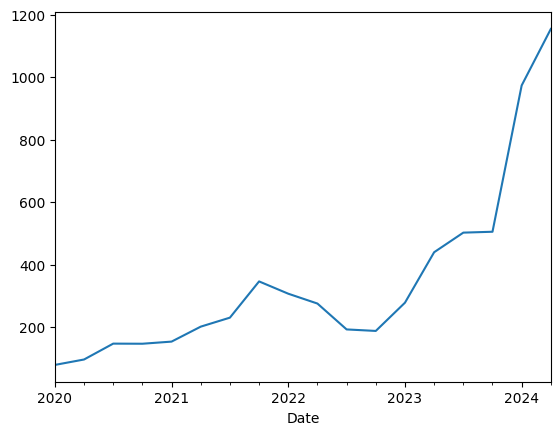

In [60]:
nvda_data.resample(rule='QS').max()['High'].plot()

<Axes: xlabel='Date'>

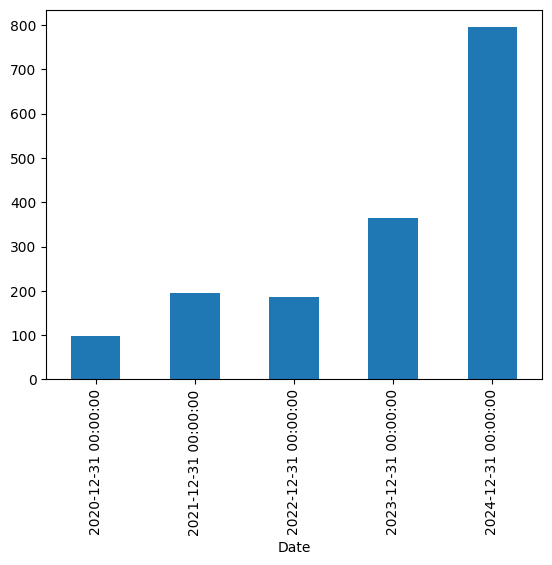

In [61]:
nvda_data['Open'].resample(rule='A').mean().plot(kind='bar')

<Axes: xlabel='Date'>

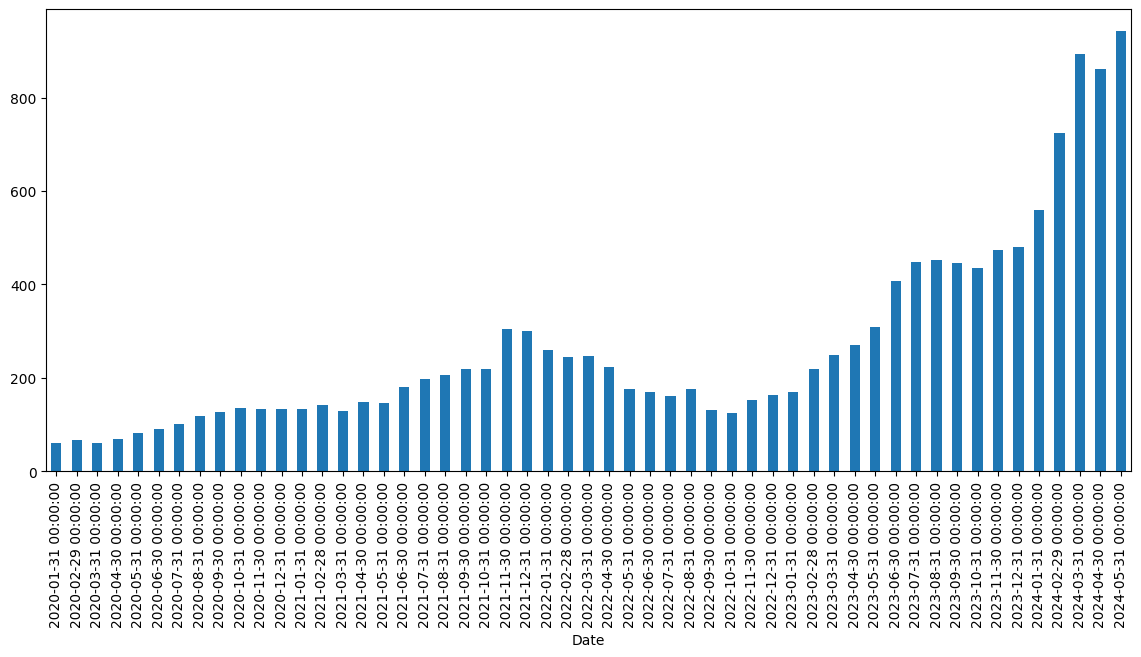

In [63]:
nvda_data['Open'].resample(rule='M').mean().plot(kind='bar',figsize=(14,6))

In [70]:
nvda_data['Open: 30 days rolling'] = nvda_data['Open'].rolling(30).mean()

In [72]:
nvda_data.head(31)

,Open,High,Low,Close,Adj Close,Volume,Open: 30 days rolling
Date,,,,,,,
2020-01-02,59.687500,59.977501,59.180000,59.977501,59.741238,23753600,NaN
2020-01-03,58.775002,59.457500,58.525002,59.017502,58.785023,20538400,NaN
2020-01-06,58.080002,59.317501,57.817501,59.264999,59.031551,26263600,NaN
2020-01-07,59.549999,60.442501,59.097500,59.982498,59.746216,31485600,NaN
2020-01-08,59.939999,60.509998,59.537498,60.095001,59.858280,27710800,NaN
2020-01-09,60.962502,61.482498,60.215000,60.755001,60.515682,25511200,NaN
2020-01-10,61.832500,62.137501,60.937500,61.080002,60.839397,31629600,NaN
2020-01-13,61.915001,63.247501,61.687500,62.994999,62.746857,31984000,NaN
2020-01-14,62.564999,62.820000,61.687500,61.820000,61.576481,35908800,NaN


<Axes: xlabel='Date'>

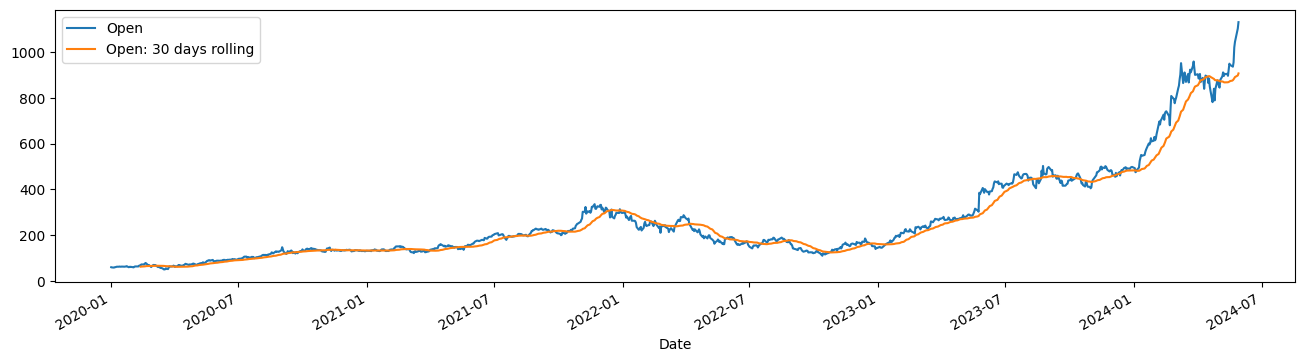

In [73]:
nvda_data[['Open','Open: 30 days rolling']].plot(figsize=(16,4))

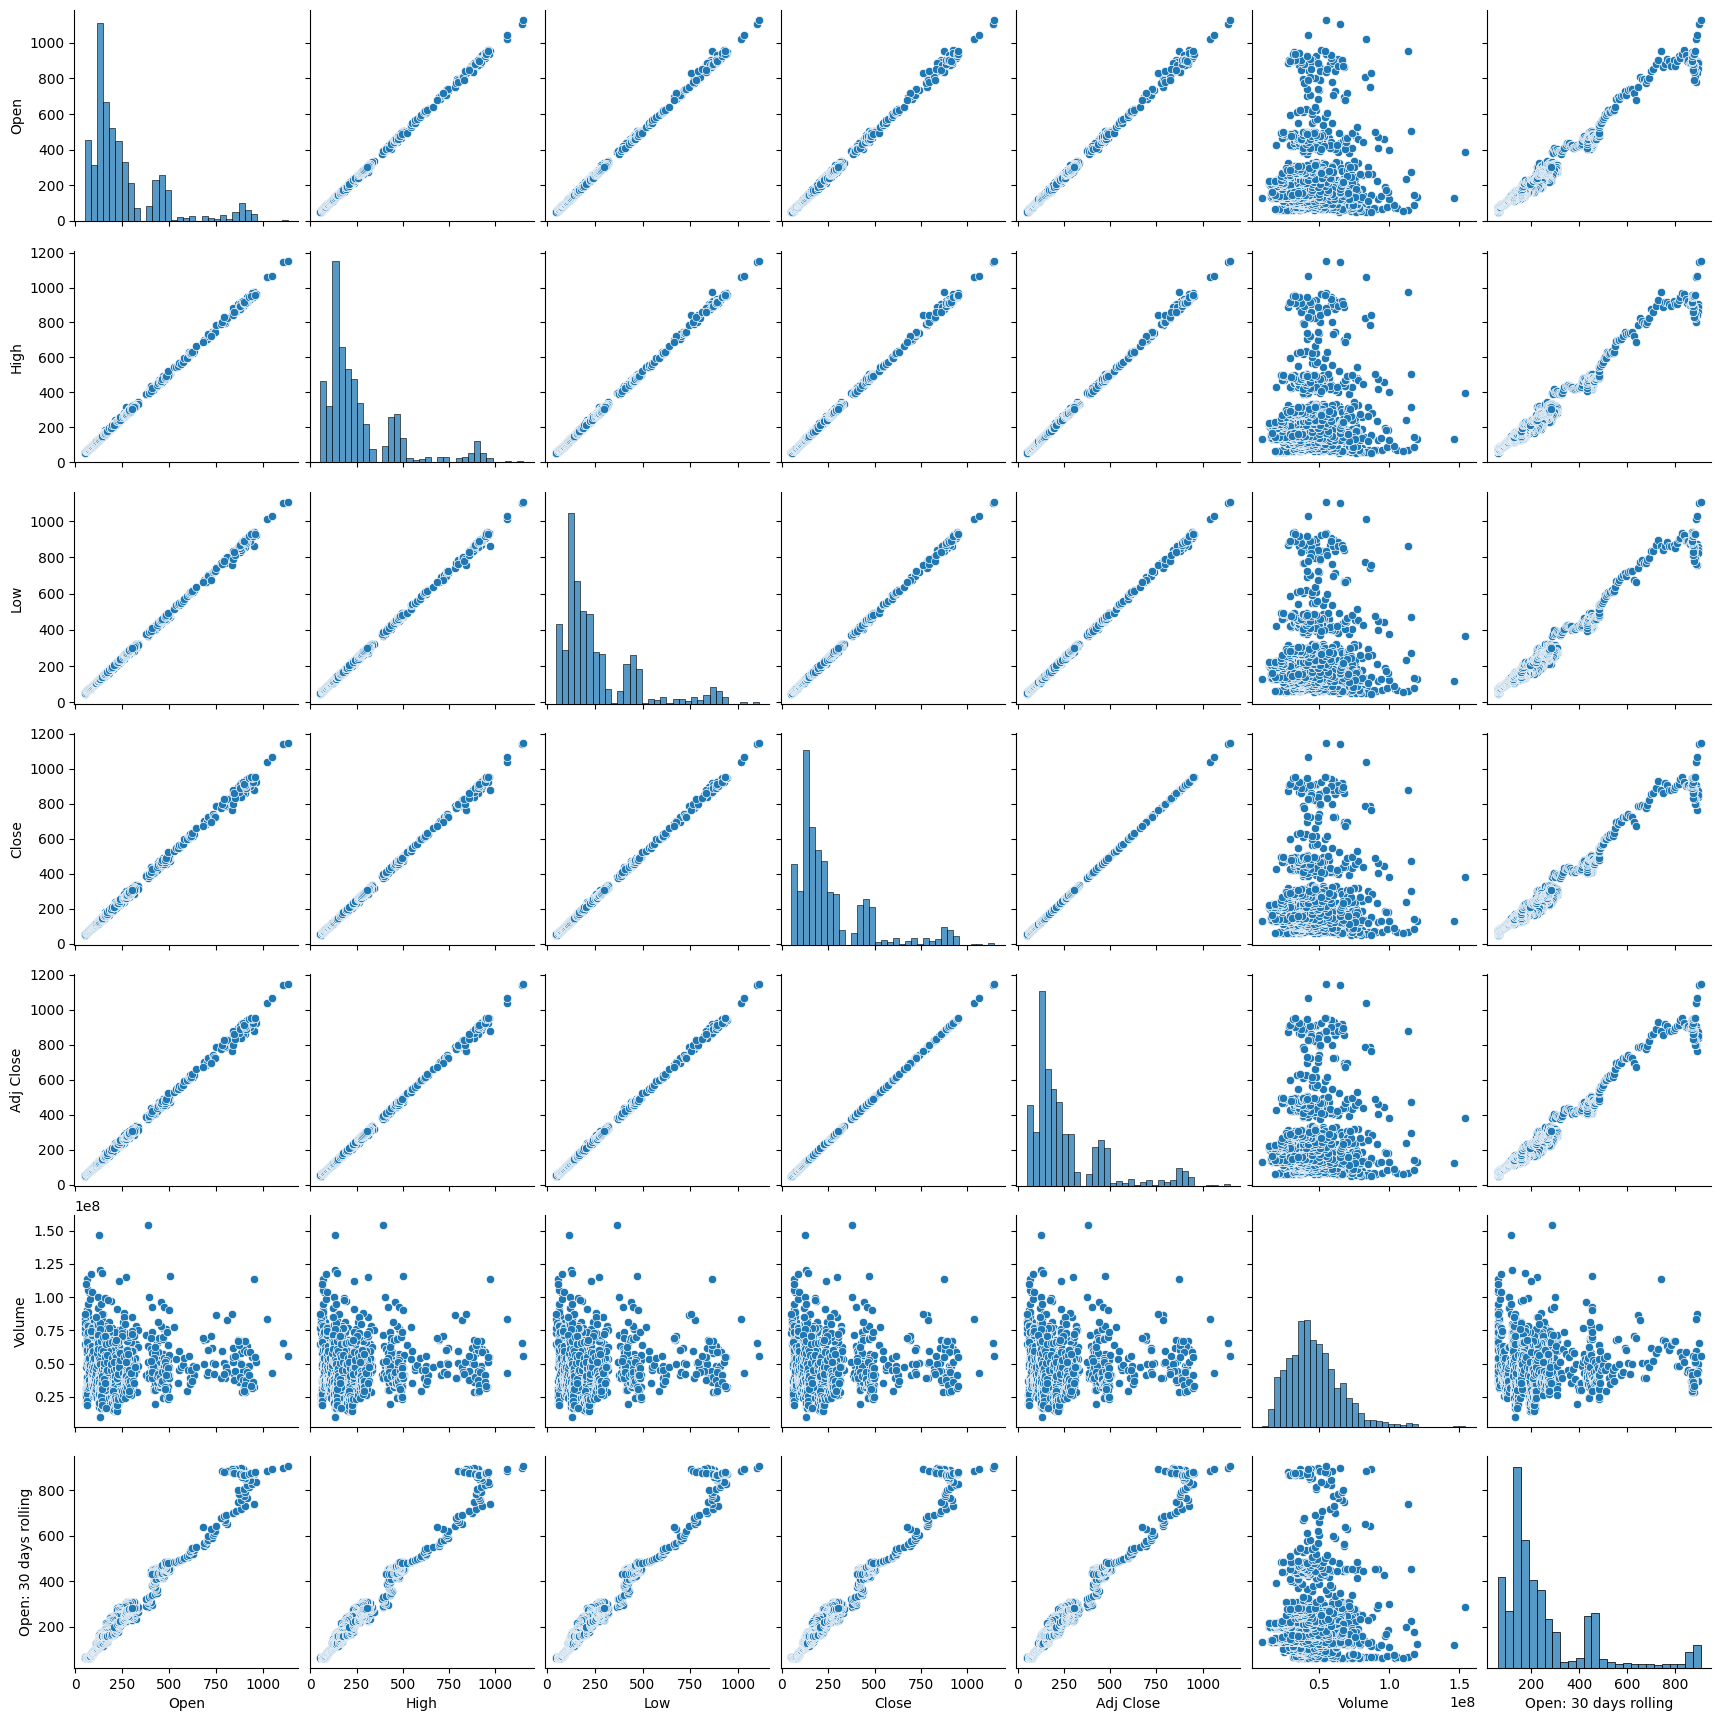

In [78]:
sns.pairplot(nvda_data)

In [86]:
nvda_data.corr()

,Open,High,Low,Close,Adj Close,Volume,Open: 30 days rolling
Open,1.000000,0.999723,0.999609,0.999167,0.999166,0.046150,0.988617
High,0.999723,1.000000,0.999609,0.999581,0.999580,0.053183,0.988448
Low,0.999609,0.999609,1.000000,0.999701,0.999702,0.038402,0.988092
Close,0.999167,0.999581,0.999701,1.000000,1.000000,0.045067,0.987802
Adj Close,0.999166,0.999580,0.999702,1.000000,1.000000,0.045131,0.987808
Volume,0.046150,0.053183,0.038402,0.045067,0.045131,1.000000,0.010722
Open: 30 days rolling,0.988617,0.988448,0.988092,0.987802,0.987808,0.010722,1.000000


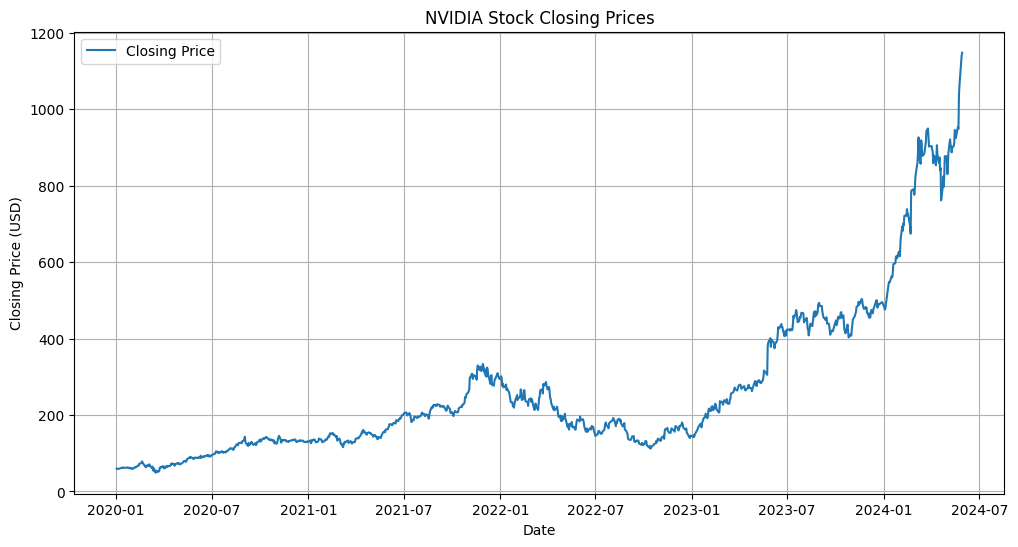

In [89]:
plt.figure(figsize=(12, 6))
plt.plot(nvda_data['Close'], label='Closing Price')
plt.title('NVIDIA Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

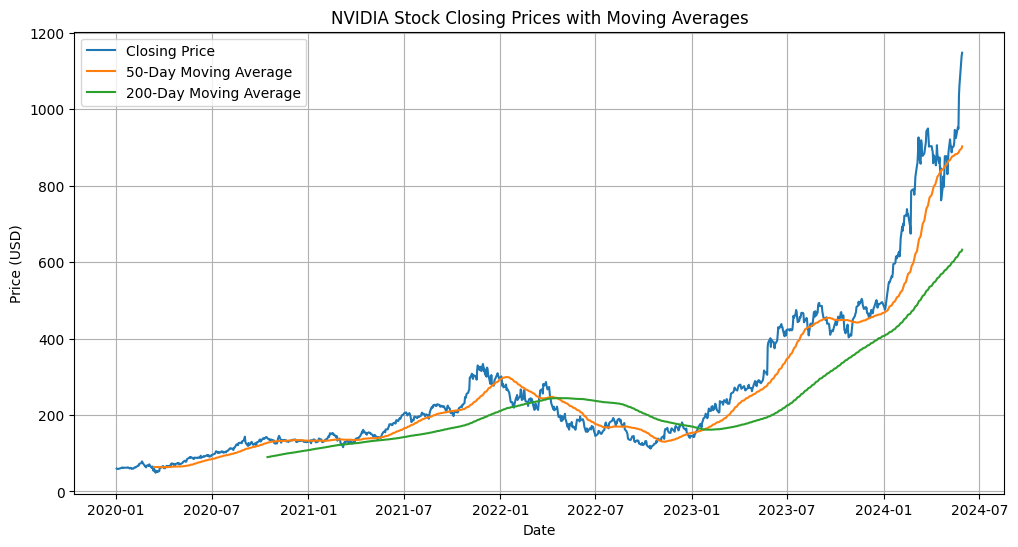

In [92]:
nvda_data['MA50'] = nvda_data['Close'].rolling(window=50).mean()
nvda_data['MA200'] = nvda_data['Close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(nvda_data['Close'], label='Closing Price')
plt.plot(nvda_data['MA50'], label='50-Day Moving Average')
plt.plot(nvda_data['MA200'], label='200-Day Moving Average')
plt.title('NVIDIA Stock Closing Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

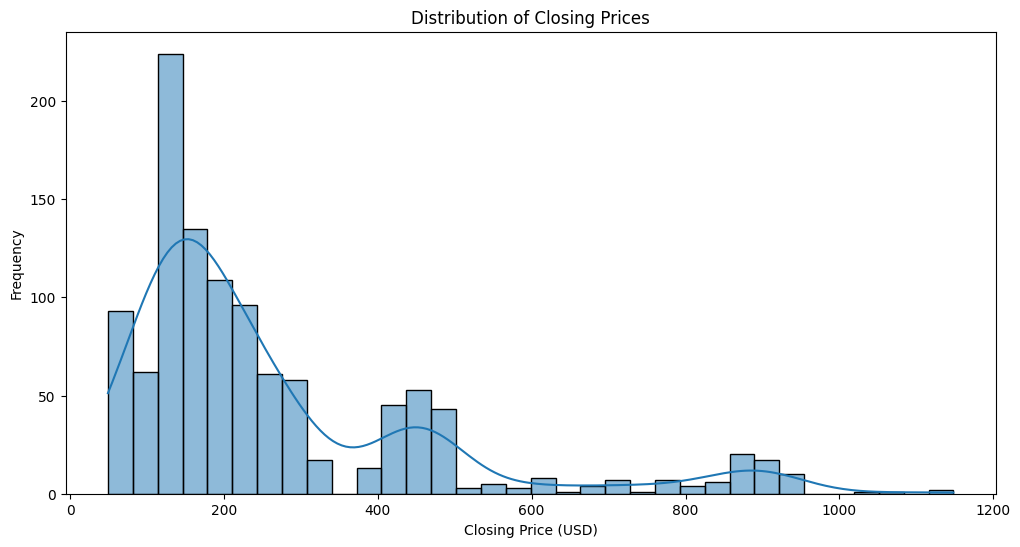

In [93]:
plt.figure(figsize=(12, 6))
sns.histplot(nvda_data['Close'], kde=True)
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price (USD)')
plt.ylabel('Frequency')
plt.show()

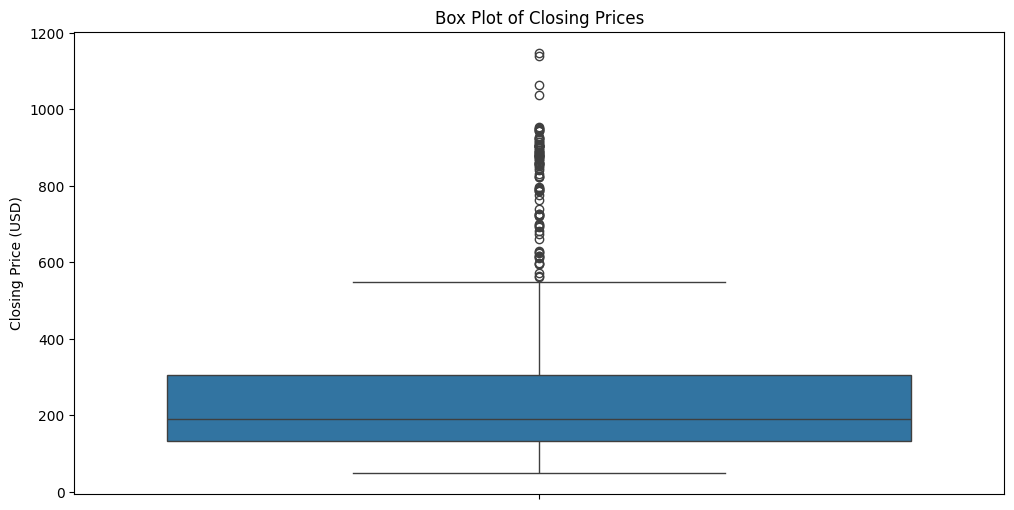

In [95]:
plt.figure(figsize=(12, 6))
sns.boxplot(y=nvda_data['Close'])
plt.title('Box Plot of Closing Prices')
plt.ylabel('Closing Price (USD)')
plt.show()

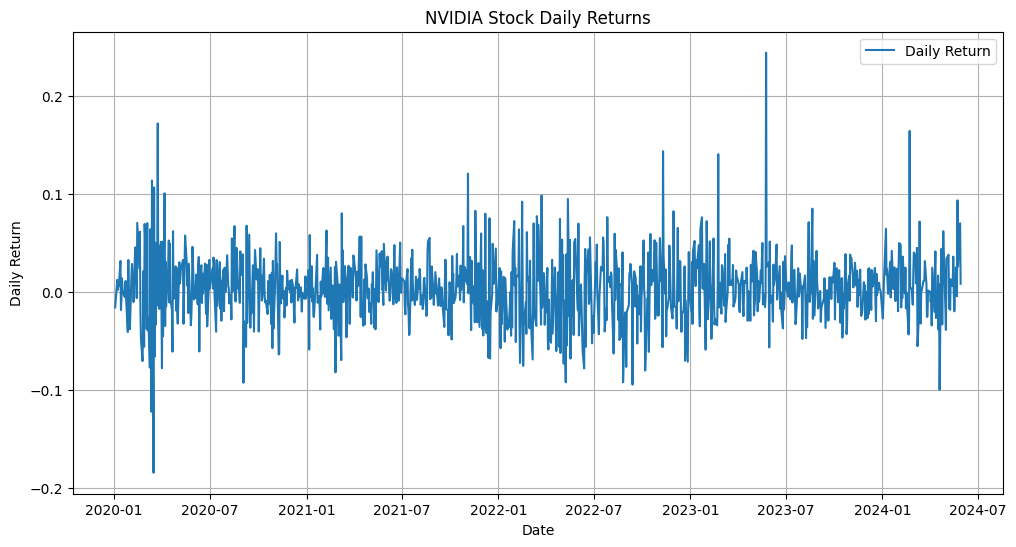

In [96]:
nvda_data['Daily Return'] = nvda_data['Close'].pct_change()
plt.figure(figsize=(12, 6))
plt.plot(nvda_data['Daily Return'], label='Daily Return')
plt.title('NVIDIA Stock Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()

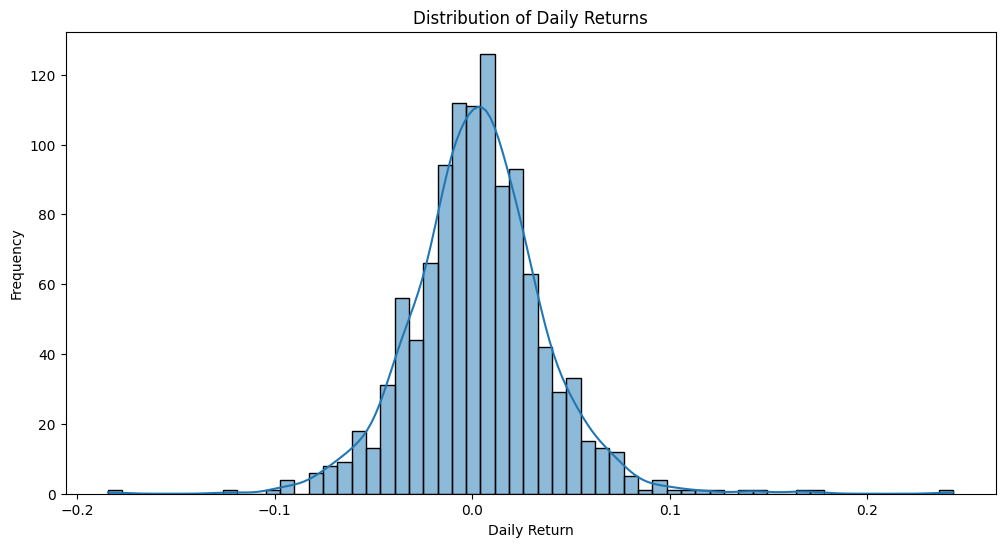

In [97]:
plt.figure(figsize=(12, 6))
sns.histplot(nvda_data['Daily Return'].dropna(), kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

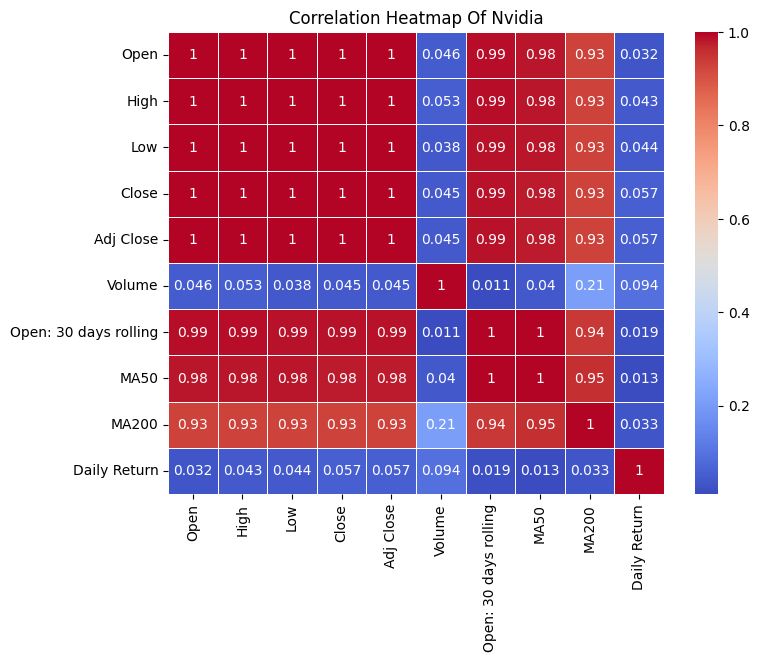

In [99]:
corr = nvda_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5).set_title("Correlation Heatmap Of Nvidia")
plt.show()